Content from https://github.com/StatsWithR
and https://www.coursera.org/specializations/statistics
data from https://github.com/StatsWithR/statsr

Some define statistics as the field that focuses on turning information into
knowledge. The first step in that process is to summarize and describe the raw
information - the data. 

In this lab we explore flights, specifically a random
sample of domestic flights that departed from the three major 
New York City airport in 2013. We will generate simple graphical and numerical 
summaries of data on these flights and explore delay times. As this is a large 
data set, along the way you'll also learn the indispensable skills of data 
processing and subsetting.



In [1]:
# Load packages
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from __future__ import division

In [2]:
# Load plotting packages
import seaborn as sns
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
nycflights = pd.read_csv("../../data-files/nycflights.csv")

In [4]:
# get the basic info about the data 
nycflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 17 columns):
Unnamed: 0    32735 non-null int64
year          32735 non-null int64
month         32735 non-null int64
day           32735 non-null int64
dep_time      32735 non-null int64
dep_delay     32735 non-null int64
arr_time      32735 non-null int64
arr_delay     32735 non-null int64
carrier       32735 non-null object
tailnum       32735 non-null object
flight        32735 non-null int64
origin        32735 non-null object
dest          32735 non-null object
air_time      32735 non-null int64
distance      32735 non-null int64
hour          32735 non-null int64
minute        32735 non-null int64
dtypes: int64(13), object(4)
memory usage: 4.2+ MB


In [5]:
# Again let us remove the R index Unnamed: 0
del(nycflights['Unnamed: 0'])

In [6]:
# Our datframe is a 32735 x 16 matrix. 
nycflights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 16 columns):
year         32735 non-null int64
month        32735 non-null int64
day          32735 non-null int64
dep_time     32735 non-null int64
dep_delay    32735 non-null int64
arr_time     32735 non-null int64
arr_delay    32735 non-null int64
carrier      32735 non-null object
tailnum      32735 non-null object
flight       32735 non-null int64
origin       32735 non-null object
dest         32735 non-null object
air_time     32735 non-null int64
distance     32735 non-null int64
hour         32735 non-null int64
minute       32735 non-null int64
dtypes: int64(12), object(4)
memory usage: 4.0+ MB


7 basic steps in DataAnalysis. We list the R methods (dplyr) and the corresponding Pandas functions in python
1. filter()  ->                      df.query()
+  arrange() ->                    df.sort_values()
+  select()  ->                    df[[col1,col3]] or df.loc[:, col1:col3]
+  distinct() ->                   df[col1].drop_duplicates()
+  mutate()   ->                   df.assign()
+  summarise()  ->                 df.groupby(col1).agg() or .apply or .sum() 
+  sample_n()   ->                 df.sample(n=)

Filtering

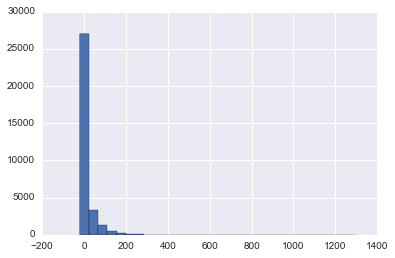

In [7]:
# First let us look at some distributions
nycflights['dep_delay'].hist(bins=30)

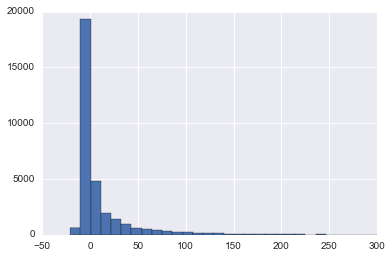

In [8]:
# Most action is within 300. Lets focus on this region. 
# This is called filtering : Where we select a portion of the data set
delay_300 = nycflights['dep_delay'] <= 300
nycflights[delay_300]['dep_delay'].hist(bins=30)
# We see a more detailed right skewed distribution

In [9]:
# What if we are interested in departures delay to a particular destination. 
# First Let us look at all the destinations
nycflights['dest']

0        LAX
1        SJU
2        LAX
3        TPA
4        ORF
5        ORD
6        HOU
7        IAD
8        MIA
9        JAX
10       ROC
11       RSW
12       DAY
13       ATL
14       BTV
15       BUF
16       DCA
17       FLL
18       ORD
19       SFO
20       PIT
21       PBI
22       PBI
23       DEN
24       CLT
25       CMH
26       CLT
27       BUF
28       LAS
29       DTW
        ... 
32705    MSY
32706    SJU
32707    CLT
32708    BNA
32709    LAX
32710    PBI
32711    PBI
32712    LAX
32713    PHL
32714    SLC
32715    ATL
32716    DTW
32717    MDW
32718    DCA
32719    RDU
32720    SFO
32721    PWM
32722    DFW
32723    BWI
32724    MKE
32725    RDU
32726    DEN
32727    BOS
32728    ORD
32729    IND
32730    PIT
32731    LAS
32732    IAH
32733    CHS
32734    CLE
Name: dest, dtype: object

In [10]:
# There are a lot of them. How may unique destinations are there? We need a frequency table for
# this.
print nycflights['dest'].value_counts()
print len(nycflights['dest'].value_counts())

ATL    1653
ORD    1588
LAX    1583
BOS    1470
CLT    1383
MCO    1376
SFO    1345
MIA    1220
FLL    1183
DCA     963
DTW     889
DFW     851
RDU     801
TPA     746
DEN     736
IAH     729
MSP     712
PBI     620
SJU     587
LAS     584
BNA     557
IAD     535
BUF     488
PHX     456
MDW     437
STL     430
CLE     415
SEA     370
CVG     360
RSW     348
       ... 
PVD      43
BGR      42
PSE      39
DSM      37
ALB      37
BHM      34
SJC      33
BUR      31
OKC      29
AVL      26
EGE      25
OAK      25
TUL      25
ACK      24
SMF      23
ABQ      22
MVY      16
CRW      12
ILM      11
CAE       9
TVC       6
MYR       4
PSP       2
MTJ       2
BZN       2
JAC       2
HDN       2
EYW       1
CHO       1
ANC       1
Name: dest, dtype: int64
102


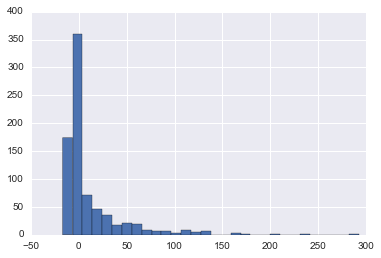

In [11]:
# We are interested in dep delays to RDU (Raleigh-Durham International Airport). 
# Need to filter our data again.
rdu = nycflights['dest'] == 'RDU'
nycflights[rdu]['dep_delay'].hist(bins=30)


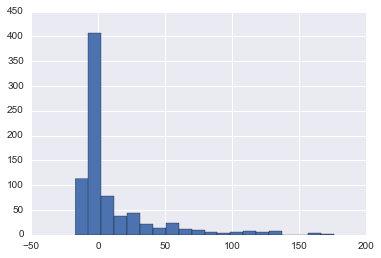

In [12]:
# Here most of the action is within 200. Lets filter again.
delay_200 = nycflights['dep_delay'] <= 200
# We need delay times less than 200 AND destination to RDU. We use the bitwise and
nycflights[rdu & delay_200]['dep_delay'].hist(bins=20)

In [13]:
# Suppose we are interested in number of flights headed to SFO in Feb
# We filter for dest == SFO and month == Feb
san_fran = nycflights['dest'] == 'SFO'
feb = nycflights['month'] == 2
san_flight_feb = nycflights[san_fran & feb]
print "There are " + str(len(san_flight_feb)) + " flights to SFO in Feb"

There are 68 flights to SFO in Feb


Summarise

In [14]:
# First let us get the summary statistics for all the variables in the data frame
nycflights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,32735.0,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000,32735.000000
mean,2013.0,6.576081,15.777241,1349.265862,12.705147,1502.907408,7.100810,1947.796579,150.441912,1046.244051,13.174462,31.819704
std,0.0,3.413269,8.793983,488.690994,40.407426,532.412363,44.687329,1621.204308,93.527663,733.681907,4.899536,18.226010
min,2013.0,1.000000,1.000000,1.000000,-21.000000,1.000000,-73.000000,1.000000,22.000000,94.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,908.000000,-5.000000,1106.000000,-17.000000,550.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1358.000000,-2.000000,1537.000000,-5.000000,1473.000000,129.000000,888.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1939.000000,14.000000,3416.000000,191.000000,1391.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,6181.000000,686.000000,4983.000000,24.000000,59.000000


In [15]:
# We want summary statistics of the dep_delay but for specific groups. For example the mean dep_delay
# for flights originating from each of the 3 airports.
nycflights['origin'].value_counts()

EWR    11771
JFK    10897
LGA    10067
Name: origin, dtype: int64

This is part of a basic techinque called split-apply-combine. We use groupby to split the data 
frame into different groups and then combine them using some functions.

In [16]:
# Lets group the dep_delay by origin and apply the mean function
nycflights['dep_delay'].groupby(nycflights['origin']).agg('mean')

origin
EWR    15.310339
JFK    12.265486
LGA    10.134896
Name: dep_delay, dtype: float64

In [17]:
# We can use the describe() method as an apply-combine function to get summary statistics
nycflights['dep_delay'].groupby(nycflights['origin']).describe()

origin       
EWR     count    11771.000000
        mean        15.310339
        std         41.755376
        min        -20.000000
        25%         -4.000000
        50%         -1.000000
        75%         15.000000
        max        849.000000
JFK     count    10897.000000
        mean        12.265486
        std         40.031590
        min        -17.000000
        25%         -5.000000
        50%         -1.000000
        75%         10.000000
        max       1301.000000
LGA     count    10067.000000
        mean        10.134896
        std         39.007138
        min        -21.000000
        25%         -6.000000
        50%         -3.000000
        75%          7.000000
        max        803.000000
dtype: float64

Summarise and arrange

Which month would you expect to have the highest average delay departing from an NYC airport?

Let’s think about how we would answer this question:

First, calculate monthly averages for departure delays. With the new language we are learning, we need to
group_by months, then
summarise mean departure delays.
Then, we need to arrange these average delays in descending order

In [18]:
mon_del = nycflights['dep_delay'].groupby(nycflights['month']).agg('mean')
mon_del.sort_values(ascending=False)

month
7     20.754559
6     20.350293
12    17.368189
4     14.554477
3     13.517602
5     13.264800
8     12.619097
2     10.687227
1     10.233333
9      6.872436
11     6.103183
10     5.880374
Name: dep_delay, dtype: float64

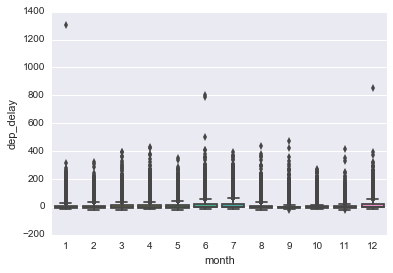

In [19]:
# We can visualize this also by a boxplot
sns.boxplot(x='month', y='dep_delay', data=nycflights)

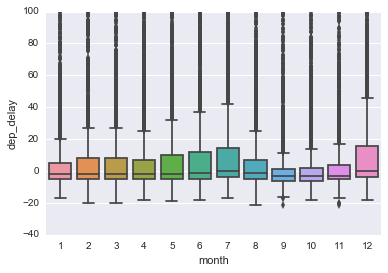

In [20]:
# Again we see most of the "action" is around a 100, so lets filter that out in our box plot
delay_100 = nycflights['dep_delay'] <= 100
sns.boxplot(x='month', y='dep_delay', data=nycflights[delay_100])

Suppose you will be flying out of NYC and want to know which of the three major NYC airports has the best on time departure rate of departing flights. Suppose also that for you a flight that is delayed for less than 5 minutes is basically “on time”. You consider any flight delayed for 5 minutes of more to be “delayed”.

In order to determine which airport has the best on time departure rate, we need to

first classify each flight as “on time” or “delayed”,
then group flights by origin airport,
then calculate on time departure rates for each origin airport,
and finally arrange the airports in descending order for on time departure percentage.

In [21]:
# First classify each flight as on time or delayed : Mutate 1 for delay < 5 and 0 for >= 5
# Here we create an indicator variable
nycflights =  nycflights.assign(dep_type = (nycflights['dep_delay'] < 5).astype(int))

In [22]:
# group by origin airport
group_origin = nycflights.groupby(nycflights['origin'])

In [23]:
# create an aggregate function on the column dep_type. In general, this is a dictionary that 
# specifies 
# what function to perform on each column. 
# We can create a Multi-level dict: column name, for each column specify the 
# function name and the function. 

aggregations = {
    # The column to aggregate on is dep_type
    'dep_type':{
        # function name is dep_rate and function is sum/total
        'dep_rate': lambda x: sum(x)/len(x),
        # can add other functions here
    }
    # can add other columns here 
}

In [24]:
# apply the aggregate function and store it
s = group_origin.agg(aggregations)
# multi-level now 0th column, 0th level
s.sortlevel([0,0], ascending=False)


,dep_type
,dep_rate
origin,
LGA,0.727923
JFK,0.693585
EWR,0.636989


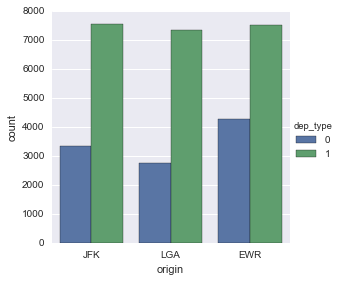

In [25]:
# We can visualize this with a factor plot
sns.factorplot("origin", hue='dep_type', kind="count", data=nycflights)

In [26]:
# Let us modify the aggregation function by adding a new function on dep_type and a new column
aggregations2 = {
    # The column to aggregate on is dep_type
    'dep_type':{
        # function name is dep_rate and function is sum/total
        'dep_rate': lambda x: sum(x)/len(x),
        'intime': 'sum'
    },
    'arr_delay':{
        'tot_arr_delay': 'sum'
    }
}

In [27]:
# apply the aggregate function and store it
s = group_origin.agg(aggregations2)

In [28]:
s

arr_delay  dep_type       
       tot_arr_delay  dep_rate intime
origin                               
EWR           109786  0.636989   7498
JFK            65206  0.693585   7558
LGA            57453  0.727923   7328

In [29]:
# Let us sort by dep_type intime
s.sortlevel(['intime'], ascending=False)

arr_delay  dep_type       
       tot_arr_delay  dep_rate intime
origin                               
LGA            57453  0.727923   7328
JFK            65206  0.693585   7558
EWR           109786  0.636989   7498

In [30]:
s.columns

MultiIndex(levels=[[u'arr_delay', u'dep_type'], [u'dep_rate', u'intime', u'tot_arr_delay']],
           labels=[[0, 1, 1], [2, 0, 1]])